In [69]:
import pandas as pd;
import math
import numpy as np
%matplotlib inline
from matplotlib import pylab as plt;
import matplotlib
matplotlib.rcParams.update({'font.size': 13})
pd.set_option('display.max_columns', 21)


## Do some preparation for data
What could be done with data:
- data could be grouped by some values
- value of some columns could be changed using any logic(like if value less than 0 replace it by "no"


In [46]:
data = pd.read_csv("data_v2_eng.csv", sep=";");
def changeSex(x):
    if x == 1:
        return "m"#"м"
    else:
        return "f"#"ж"

data["Sex"] = data["Sex"].apply(changeSex)

data = data.fillna(0, axis=1)

## Print entire table in order to understand what kind of data we have

In [70]:
data

,Patient,Date,BA,Normal,Age,Sex,Height,Weight,BMI,HBP duration,...,%Neutrophils,%Lymphocyte,%Monocytes,%Eosinophils,%Basophils,Neutrophils absolute value,Lymphocytes absolute value,Monocytes absolute value,Eosinophils absolute value,Basophils absolute value
0,1,25.09.2013,1.0,0.0,73.0,f,1.59,85.0,33.62,25.0,...,54.9,36.4,7.93,0.12,0.69,2.7,1.8,0.39,0.01,0.03
1,2,25.11.2013,1.0,0.0,67.0,f,1.56,92.0,37.80,25.0,...,64.5,28.1,6.57,0.44,0.40,5.4,2.4,0.55,0.04,0.03
2,3,26.11.2013,1.0,0.0,61.0,f,1.65,78.0,28.65,7.0,...,52.6,36.9,7.56,2.14,0.72,3.4,2.4,0.48,0.14,0.05
3,4,02.12.2013,1.0,0.0,33.0,m,1.76,125.0,40.35,3.0,...,59.7,29.3,6.81,3.05,1.22,4.7,2.3,0.54,0.24,0.10
4,5,19.12.2013,1.0,0.0,64.0,m,1.85,95.0,27.76,15.0,...,65.1,28.5,3.34,2.42,0.62,5.1,2.2,0.26,0.19,0.05
5,6,14.02.2014,1.0,0.0,36.0,m,1.65,70.0,25.71,2.0,...,66.0,27.5,6.50,0.00,0.00,6.2,2.6,0.24,0.14,0.05
6,7,02.11.2014,1.0,0.0,62.0,m,1.71,79.0,27.02,1.0,...,61.5,25.4,8.47,2.94,1.74,3.3,1.4,0.46,0.16,0.09
7,8,10.04.2014,1.0,0.0,70.0,m,1.90,110.0,30.47,10.0,...,68.5,20.6,9.37,0.77,0.74,5.0,1.5,0.68,0.06,0.05
8,9,20.05.2014,1.0,0.0,68.0,f,1.56,89.0,36.57,25.0,...,48.0,38.5,9.17,3.19,1.13,2.9,2.3,0.55,0.19,0.07
9,10,03.03.2015,1.0,0.0,54.0,f,1.67,70.0,25.10,2.0,...,63.5,30.3,0.23,0.93,1.07,3.4,1.6,0.23,0.05,0.06


In [48]:
def getRowsByRange(data,field, fr, to):
    return data[(data[field] >= fr) & (data[field] < to)]



## Cholesterol level for patients with and withour BA per age group(30-40, 40-50,...)

[]

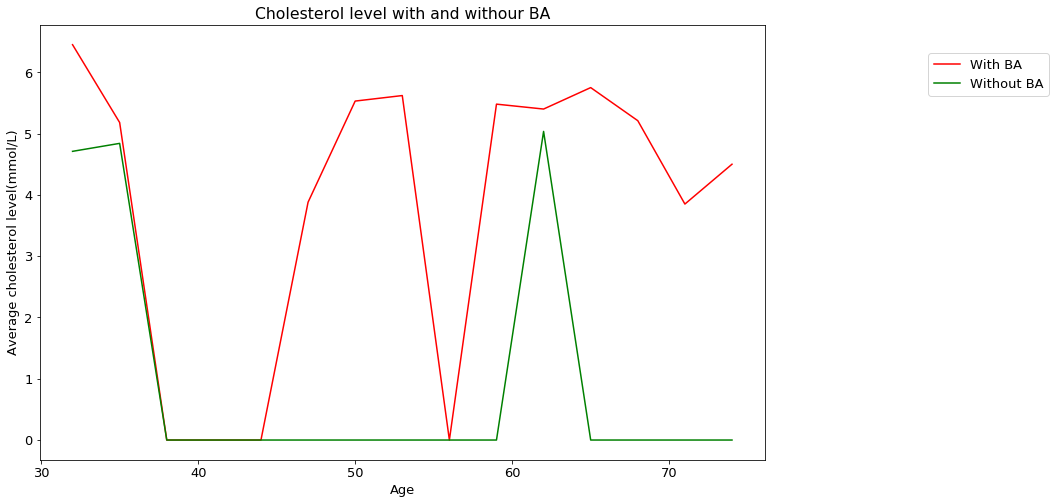

In [49]:
#bloodAnalysis = data[data[""]]

plt.figure(figsize=(13, 8))
intervals = [];
start = int(min(data["Age"]))
end = int(max(data["Age"]))
step = 3;
ages = [];
hol1 = [];
hol2 = [];
for i in range(start, end, step):
    t = getRowsByRange(data[data["BA"] > 0], "Age", i, i + step)
    d = getRowsByRange(data[data["BA"] == 0], "Age", i, i + step)
    h1 = t.mean()["Холестерин"]
    h1 = np.nan_to_num(h1)
    h2 = d.mean()["Холестерин"]
    h2 = np.nan_to_num(h2)
    hol1.append(h1)
    hol2.append(h2)
    intervals.append(len(getRowsByRange(data, "Age", i, i+step)));
    ages.append(i)
    
plt.plot(ages, hol1, color='red', label=u"With BA")
plt.plot(ages, hol2, color='green', label=u"Without BA")
plt.title(u"Cholesterol level with and withour BA")
plt.xlabel(u"Age");
plt.ylabel(u"Average cholesterol level(mmol/L)");
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.plot()

## ESR level for patients with and withour BA per age group(30-40, 40-50,...)

[]

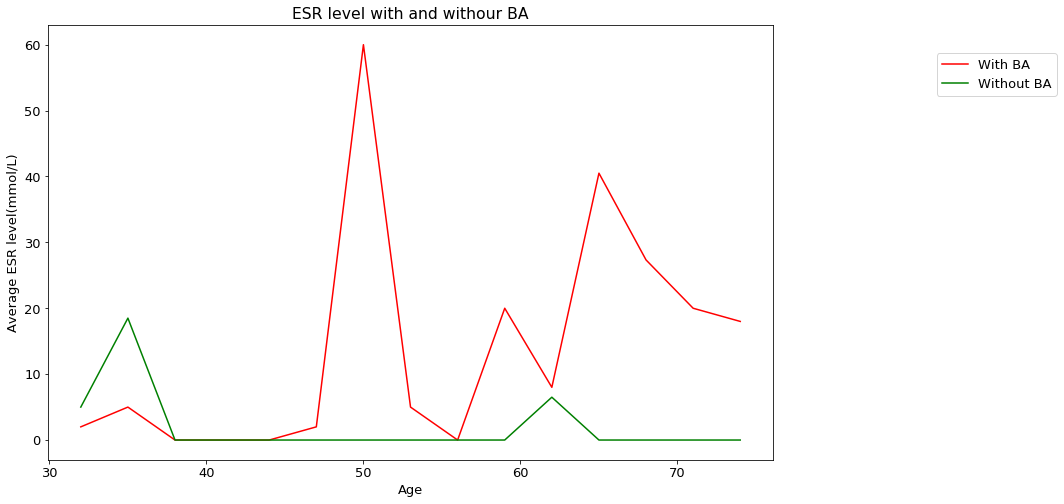

In [50]:
plt.figure(figsize=(13, 8))
intervals = [];
start = int(min(data["Age"]))
end = int(max(data["Age"]))
step = 3;
ages = [];
hol1 = [];
hol2 = [];
for i in range(start, end, step):
    t = getRowsByRange(data[data["BA"] > 0], "Age", i, i + step)
    d = getRowsByRange(data[data["BA"] == 0], "Age", i, i + step)
    h1 = t.mean()["СОЭ"]
    h1 = np.nan_to_num(h1)
    h2 = d.mean()["СОЭ"]
    h2 = np.nan_to_num(h2)
    hol1.append(h1)
    hol2.append(h2)
    intervals.append(len(getRowsByRange(data, "Age", i, i+step)));
    ages.append(i)
 
plt.plot(ages, hol1, color='red', label=u"With BA")
plt.plot(ages, hol2, color='green', label=u"Without BA")
plt.title(u"ESR level with and withour BA")
plt.xlabel(u"Age");
plt.ylabel(u"Average ESR level(mmol/L)");
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.plot()


## Get data connected to smoking for patients that have BA(bronchial asthma)


In [51]:
paramsToShow = ["Patient", "BA","Smoking now", "Duration of smoking", "Cigarettes per day", "Smoking before"];
data[data["BA"] > 0].ix[:, paramsToShow]

,Patient,BA,Smoking now,Duration of smoking,Cigarettes per day,Smoking before
0,1,1.0,0.0,0.0,0.0,0.0
1,2,1.0,0.0,0.0,0.0,0.0
2,3,1.0,0.0,0.0,0.0,0.0
3,4,1.0,1.0,15.0,20.0,0.0
4,5,1.0,0.0,0.0,0.0,0.0
5,6,1.0,1.0,15.0,20.0,1.0
6,7,1.0,0.0,0.0,0.0,0.0
7,8,1.0,0.0,5.0,10.0,1.0
8,9,1.0,0.0,0.0,0.0,0.0
9,10,1.0,0.0,0.0,0.0,0.0


## Get data connected to smoking for patients that don't have BA(bronchial asthma)

In [52]:
data[data["BA"] == 0].ix[:, paramsToShow]

,Patient,BA,Smoking now,Duration of smoking,Cigarettes per day,Smoking before
15,16,0.0,0.0,0.0,0.0,0.0
16,17,0.0,0.0,0.0,0.0,0.0
17,18,0.0,0.0,10.0,20.0,1.0
18,19,0.0,0.0,0.0,0.0,0.0
19,20,0.0,0.0,0.0,0.0,0.0


## Print all the data connected to blood analysis for patients that have BA <a name='bloodAnalysis'/>

In [53]:
bloodLabels = ["Patient", "BA","WBC", "RBC",
               "Haemoglobin", "Hematocrit","Thrombocytes", 
               "Thrombote", "%Neutrophils", "%Lymphocyte",
               "%Monocytes","%Eosinophils","%Basophils",
               "Neutrophils absolute value",
               "Lymphocytes absolute value",
               "Monocytes absolute value",
               "Eosinophils absolute value",
               "Basophils absolute value"];



In [57]:
data[data["BA"] > 0].ix[:, bloodLabels]

,Patient,BA,WBC,RBC,Haemoglobin,Hematocrit,Thrombocytes,Thrombote,%Neutrophils,%Lymphocyte,%Monocytes,%Eosinophils,%Basophils,Neutrophils absolute value,Lymphocytes absolute value,Monocytes absolute value,Eosinophils absolute value,Basophils absolute value
0,1,1.0,4.9,4.12,13.30,37.7,178.0,0.18,54.9,36.4,7.93,0.12,0.69,2.7,1.8,0.39,0.01,0.03
1,2,1.0,8.4,4.43,11.80,35.6,231.0,0.23,64.5,28.1,6.57,0.44,0.40,5.4,2.4,0.55,0.04,0.03
2,3,1.0,6.4,4.51,13.38,40.7,251.0,0.17,52.6,36.9,7.56,2.14,0.72,3.4,2.4,0.48,0.14,0.05
3,4,1.0,8.0,5.42,16.30,49.8,306.0,0.24,59.7,29.3,6.81,3.05,1.22,4.7,2.3,0.54,0.24,0.10
4,5,1.0,7.8,4.38,13.30,39.7,275.0,0.22,65.1,28.5,3.34,2.42,0.62,5.1,2.2,0.26,0.19,0.05
5,6,1.0,9.2,4.89,14.20,40.1,260.0,0.24,66.0,27.5,6.50,0.00,0.00,6.2,2.6,0.24,0.14,0.05
6,7,1.0,5.4,4.62,14.00,41.5,248.0,0.19,61.5,25.4,8.47,2.94,1.74,3.3,1.4,0.46,0.16,0.09
7,8,1.0,7.3,4.14,12.80,40.0,212.0,0.22,68.5,20.6,9.37,0.77,0.74,5.0,1.5,0.68,0.06,0.05
8,9,1.0,6.0,4.89,13.40,39.4,225.0,0.20,48.0,38.5,9.17,3.19,1.13,2.9,2.3,0.55,0.19,0.07
9,10,1.0,5.3,5.84,15.50,51.7,129.0,0.10,63.5,30.3,0.23,0.93,1.07,3.4,1.6,0.23,0.05,0.06
